In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pylab as rcParams
from datetime import datetime
#rom pandas import datetime
from sklearn import metrics

from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
color = sb.color_palette()

In [87]:
##Main Data Source
df = pd.read_csv('online_retail.csv')
df.head()            


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [88]:
#Checking from upper side 4 rows Data
df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom


In [89]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [90]:
# descriptive statistics
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

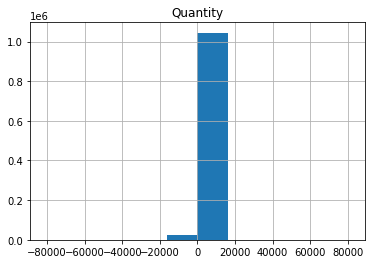

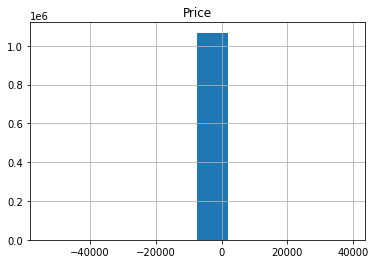

In [91]:
#Checking the frequency of Quantity and UnitPrice
df.hist(column='Quantity')
df.hist(column='Price')

In [92]:
#Chwecking the total null value of UnitPrice
df[df.Price<=0].sum()

C:\Users\White Flames\AppData\Local\Temp\ipykernel_2456\218542923.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.Price<=0].sum()


Invoice        4894644894634894674895214896554896594896604896...
StockCode      217337147785123A2164620683213503595635605A8429...
Quantity                                                 -320821
InvoiceDate    2009-12-01 10:52:002009-12-01 10:52:002009-12-...
Price                                                 -158676.14
Customer ID                                            1009038.0
Country        United KingdomUnited KingdomUnited KingdomUnit...
dtype: object

In [93]:
#Chwecking the Null value of UnitPrice
df[df.Price<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [94]:
#Chwecking the Null value of Quantity
df[df.Quantity<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [95]:
# Checking total null values in the DataSet
df.isnull().values.sum()

247389

In [96]:
df = df.rename(columns={
    "Customer ID" : "CustomerID"
})

In [97]:
# removing missing values, quantity and unit price with 0 values and Quantity = 320821
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.Price > 0) & (df.Quantity < 320821)]
# drop rows with missing value
df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


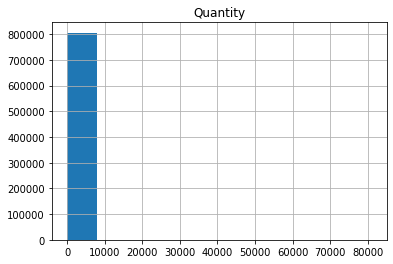

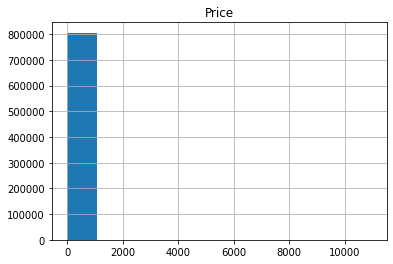

In [98]:
# Checking again the frequency of Quantity and UnitPrice
df.hist(column='Quantity')
df.hist(column='Price')
df = df[df.Country == 'United Kingdom']


In [99]:
#The index of the DataFrame.
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1067345, 1067346, 1067347, 1067348, 1067349, 1067350, 1067351,
            1067352, 1067353, 1067354],
           dtype='int64', length=725250)

In [100]:
#Total number of columns and rows
df.shape

(725250, 8)

In [101]:
#Print the Columns Name
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

In [102]:
#Checking the missing value
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [103]:
#Check the missing values inside the rows
df[df.isnull().any(axis=1)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country


In [104]:
#Change the 'InvoiceDate' format (String to TimeStamp
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%Y/%m/%d %H:%M')

In [105]:
# examine duplicated rows
df.loc[df.duplicated(), :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [106]:
##REMOVE ALL MISSING & DUPLICATE VALUES
df1=df.dropna()

In [107]:
df1.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725250 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      725250 non-null  object        
 1   StockCode    725250 non-null  object        
 2   Description  725250 non-null  object        
 3   Quantity     725250 non-null  int64         
 4   InvoiceDate  725250 non-null  datetime64[ns]
 5   Price        725250 non-null  float64       
 6   CustomerID   725250 non-null  float64       
 7   Country      725250 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 49.8+ MB


In [109]:
#Change the type customerID to Integer 
df1['CustomerID'] = df1['CustomerID'].astype('int64')

In [110]:
#Check the data types
df1.info()
df1.dtypes # Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725250 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      725250 non-null  object        
 1   StockCode    725250 non-null  object        
 2   Description  725250 non-null  object        
 3   Quantity     725250 non-null  int64         
 4   InvoiceDate  725250 non-null  datetime64[ns]
 5   Price        725250 non-null  float64       
 6   CustomerID   725250 non-null  int64         
 7   Country      725250 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 49.8+ MB


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID              int64
Country                object
dtype: object

In [111]:
df1.shape

(725250, 8)

In [112]:
#After Cleaning the New DataSet
df1.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [113]:
df1.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom


In [114]:
# Creating a new DataFrame and a new Column to findout the total Sales
df2=df1['Total_Sales'] = df1.Quantity * df1.Price
df2=df1[['Invoice','InvoiceDate','StockCode','Description','Quantity','Price','Total_Sales','CustomerID','Country']]

In [115]:
df2.head(10)

,Invoice,InvoiceDate,StockCode,Description,Quantity,Price,Total_Sales,CustomerID,Country
0,489434,2009-12-01 07:45:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.4,13085,United Kingdom
1,489434,2009-12-01 07:45:00,79323P,PINK CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
2,489434,2009-12-01 07:45:00,79323W,WHITE CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
3,489434,2009-12-01 07:45:00,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.8,13085,United Kingdom
4,489434,2009-12-01 07:45:00,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.0,13085,United Kingdom
5,489434,2009-12-01 07:45:00,22064,PINK DOUGHNUT TRINKET POT,24,1.65,39.6,13085,United Kingdom
6,489434,2009-12-01 07:45:00,21871,SAVE THE PLANET MUG,24,1.25,30.0,13085,United Kingdom
7,489434,2009-12-01 07:45:00,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,5.95,59.5,13085,United Kingdom
8,489435,2009-12-01 07:46:00,22350,CAT BOWL,12,2.55,30.6,13085,United Kingdom
9,489435,2009-12-01 07:46:00,22349,"DOG BOWL , CHASING BALL DESIGN",12,3.75,45.0,13085,United Kingdom


In [116]:
# Add Some New Columns based on location - Month, Day and Hour for the invoice
df2.insert(loc=2, column='Year_Month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df2.insert(loc=3, column='Date', value=df2.InvoiceDate.dt.date)
df2.insert(loc=4, column='Month', value=df2.InvoiceDate.dt.month)
df2.insert(loc=5, column='Week', value=df2.InvoiceDate.dt.week)
# +1 to make Monday=1.....until Sunday=7
df2.insert(loc=6, column='Day', value=(df2.InvoiceDate.dt.dayofweek)+1)
df2.insert(loc=7, column='Hour', value=df2.InvoiceDate.dt.hour)
df2.insert(loc=8, column='Day_of_week', value=df2.InvoiceDate.dt.day_name())
df2.insert(loc=9, column='Quarter', value=df2.InvoiceDate.dt.quarter)
df2.insert(loc=10, column='Year', value=df2.InvoiceDate.dt.year)

C:\Users\White Flames\AppData\Local\Temp\ipykernel_2456\1999983426.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2.insert(loc=5, column='Week', value=df2.InvoiceDate.dt.week)


In [117]:
#Now make a New dataset after prepared everything
df3=df2.to_csv('data_clean.csv',index=False)

In [118]:
#Read the data from local storage
df3=pd.read_csv('data_clean.csv')

In [119]:
df3

,Invoice,InvoiceDate,Year_Month,Date,Month,Week,Day,Hour,Day_of_week,Quarter,Year,StockCode,Description,Quantity,Price,Total_Sales,CustomerID,Country
0,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.4,13085,United Kingdom
1,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,79323P,PINK CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
2,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,79323W,WHITE CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
3,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.8,13085,United Kingdom
4,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.0,13085,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725245,581585,2011-12-09 12:31:00,201112,2011-12-09,12,49,5,12,Friday,4,2011,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,23.4,15804,United Kingdom
725246,581586,2011-12-09 12:49:00,201112,2011-12-09,12,49,5,12,Friday,4,2011,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,23.6,13113,United Kingdom
725247,581586,2011-12-09 12:49:00,201112,2011-12-09,12,49,5,12,Friday,4,2011,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,30.0,13113,United Kingdom
725248,581586,2011-12-09 12:49:00,201112,2011-12-09,12,49,5,12,Friday,4,2011,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95,214.8,13113,United Kingdom


In [120]:
#Again checked the dataset
df3.isnull().sum()

Invoice        0
InvoiceDate    0
Year_Month     0
Date           0
Month          0
Week           0
Day            0
Hour           0
Day_of_week    0
Quarter        0
Year           0
StockCode      0
Description    0
Quantity       0
Price          0
Total_Sales    0
CustomerID     0
Country        0
dtype: int64

In [121]:
# #Making the Invoice Date as a index 
# monthly_orders_df = df3.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

# df['date'] = pd.to_datetime(df['date'])
# df = df.set_index('date') 
# weekly_summary = df.story_point.resample('W').sum()

In [122]:
# # Month based Total number of orders
# ax = pd.DataFrame(monthly_orders_df.values).plot(
#     grid=True,
#     figsize=(10,7),
#     legend=False
# )

# ax.set_xlabel('date')
# ax.set_ylabel('number of orders/invoices')
# ax.set_title('Total Number of Orders Over Time')

# plt.xticks(
#     range(len(monthly_orders_df.index)), 
#     [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
#     rotation=45
# )

# plt.show()

In [123]:
# Checking the Minimum and Maximum Date
invoice_dates = df3.loc[
    df3['InvoiceDate'] <= '2011-12-01',
    'InvoiceDate'
]

print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))



Min date: 2009-12-01 07:45:00
Max date: 2011-11-30 17:37:00


In [124]:
# 
dfpre = df.loc[df['InvoiceDate'] <= '2011-12-01']

In [125]:
monthly_orders_df = dfpre.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

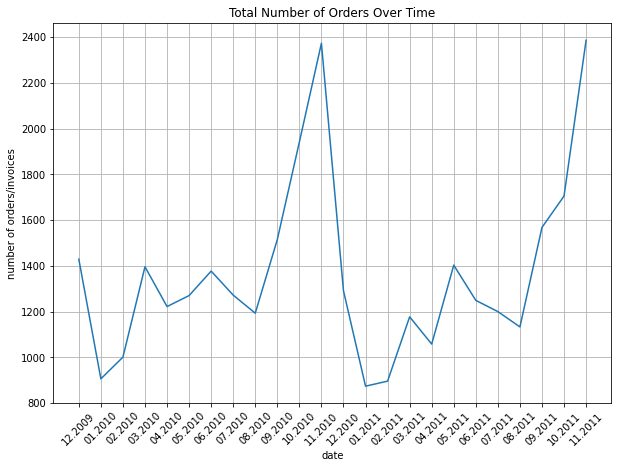

In [126]:
#Orders over Time
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

In [127]:
#Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
#maximize insight into a data set; uncover underlying structure; extract important variables; detect outliers and anomalies; test underlying assumptions;
#develop parsimonious models; and determine optimal factor settings.

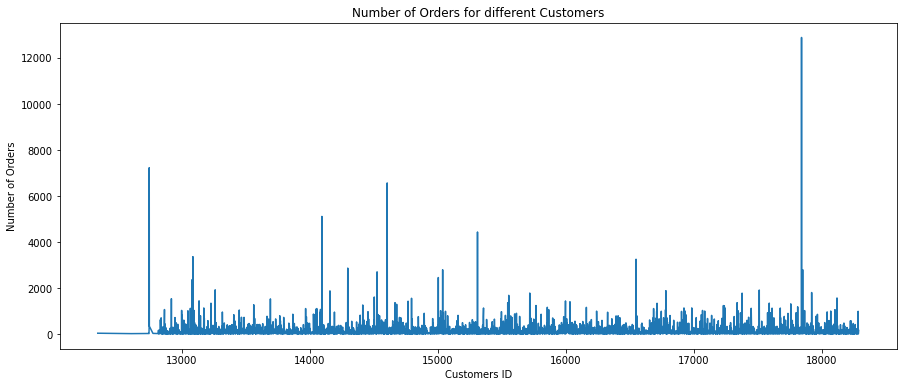

In [128]:
##EXPLORATORY DATA ANALYSIS (EDA)
#How many orders made by customers
orders = df3.groupby(by=['CustomerID','Country'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Invoice)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [129]:
#Highest orders made by customers
orders.sort_values(by='Invoice', ascending=False).head()

,CustomerID,Country,Invoice
4907,17841,United Kingdom,12890
5,12748,United Kingdom,7228
1742,14606,United Kingdom,6566
1245,14096,United Kingdom,5111
2427,15311,United Kingdom,4434


Invoice
489434    [200912]
491733    [200912]
491731    [200912]
491730    [200912]
491729    [200912]
            ...   
580432    [201112]
580434    [201112]
580436    [201112]
580298    [201112]
581586    [201112]
Name: Year_Month, Length: 33541, dtype: object

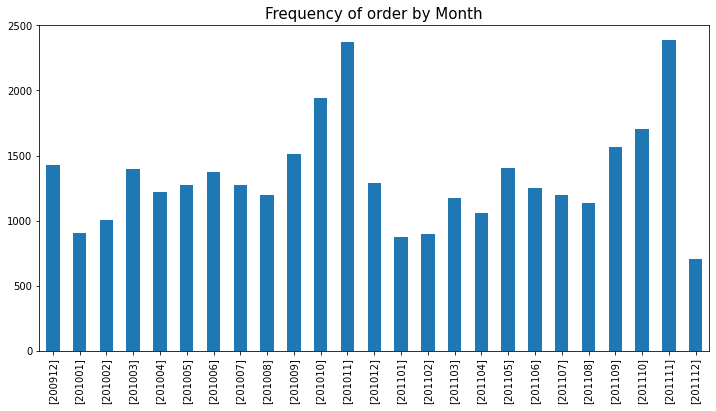

In [130]:
##How many orders made per months
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df3.groupby(['Invoice'])['Year_Month'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()
InvoiceDate.sort_values(ascending=True)
#plt.savefig('Order_by_month.png')

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

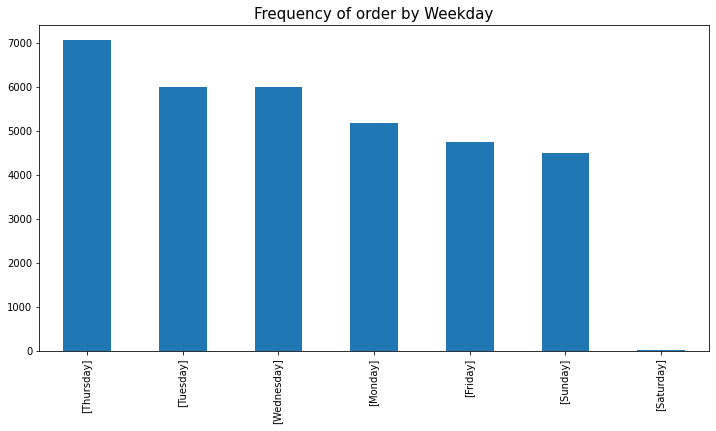

In [131]:
##Orders made by Day
#[0] ~ Sunday
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df3.groupby(['Invoice'])['Day_of_week'].unique()
#InvoiceDate = df6.groupby(['Day_of_week'])['InvoiceNo'].unique()
#InvoiceDate.value_counts().plot.bar()
InvoiceDate.sort_values(ascending=True).value_counts().plot.bar()
#plt.savefig('Order_by_WeekDay.png')

In [132]:
# #How many orders made by hour in a day
# plt.figure(figsize=(12,6))
# plt.title("Frequency of order by hour of day", fontsize=15)
# InvoiceDate = df3.groupby(['Invoice'])['Hour'].unique()
# (InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()
# #plt.savefig('Order_by_perHour-in-a-day.png')

<AxesSubplot:title={'center':'Frequency of order by Country'}, xlabel='Country'>

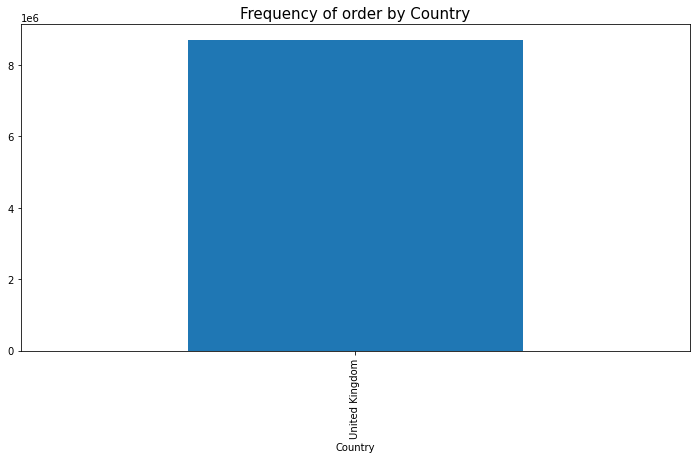

In [133]:
##Country base Transaction
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Country", fontsize=15)
df3.groupby(['Country'])['Quantity'].sum().plot.bar()

In [134]:
df3.groupby(['Description']).sum() ## Uniq iteam with quantity


,Invoice,Year_Month,Month,Week,Day,Hour,Quarter,Year,Quantity,Price,Total_Sales,CustomerID
Description,,,,,,,,,,,,
DOORMAT UNION JACK GUNS AND ROSES,25774297,10452060,60,186,212,678,52,104520,167,345.40,1071.25,826865
3 STRIPEY MICE FELTCRAFT,52537230,21302532,632,2506,426,1421,234,213019,602,205.50,1124.10,1644122
4 PURPLE FLOCK DINNER CANDLES,29989864,10858102,502,2057,207,692,185,108576,328,122.10,505.36,875279
50'S CHRISTMAS GIFT BAG LARGE,56120593,19708800,1000,4159,338,1242,372,197078,1697,122.29,2037.25,1532766
ANIMAL STICKERS,5930795,2411482,82,333,43,152,30,24114,385,2.52,80.85,182720
...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,124553141,44444832,1732,7042,762,2795,656,444431,4258,185.42,3399.62,3377412
ZINC TOP 2 DOOR WOODEN SHELF,23617659,9246012,312,1257,164,576,120,92457,216,541.70,1357.20,695086
ZINC WILLIE WINKIE CANDLE STICK,225828057,85039628,3328,13543,1527,5476,1245,850363,5239,363.58,4401.67,6535625


In [135]:
#Write the EDA Data
df4=df3.to_csv('data_eda.csv',index=False)

In [136]:
#Implement the Time series 
#Time series is a set of observations on the values that a variable takes at different times

arima=pd.read_csv("data_eda.csv",parse_dates=['Date'],index_col="Date")


In [137]:
arima.index

DatetimeIndex(['2009-12-01', '2009-12-01', '2009-12-01', '2009-12-01',
               '2009-12-01', '2009-12-01', '2009-12-01', '2009-12-01',
               '2009-12-01', '2009-12-01',
               ...
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09'],
              dtype='datetime64[ns]', name='Date', length=725250, freq=None)

In [138]:
sales=arima['InvoiceDate'].min()

In [139]:
sales

'2009-12-01 07:45:00'

In [140]:
sales=arima['InvoiceDate'].max()

In [141]:
sales

'2011-12-09 12:49:00'

In [142]:
# Daily base resampling the Total Sales
ts = arima['Total_Sales'].resample('D').sum()

In [143]:
ts

Date
2009-12-01     37366.32
2009-12-02     45644.67
2009-12-03     66327.53
2009-12-04     31448.44
2009-12-05      9042.36
                ...    
2011-12-05     54913.24
2011-12-06     42069.40
2011-12-07     49253.47
2011-12-08     47147.37
2011-12-09    179562.78
Freq: D, Name: Total_Sales, Length: 739, dtype: float64

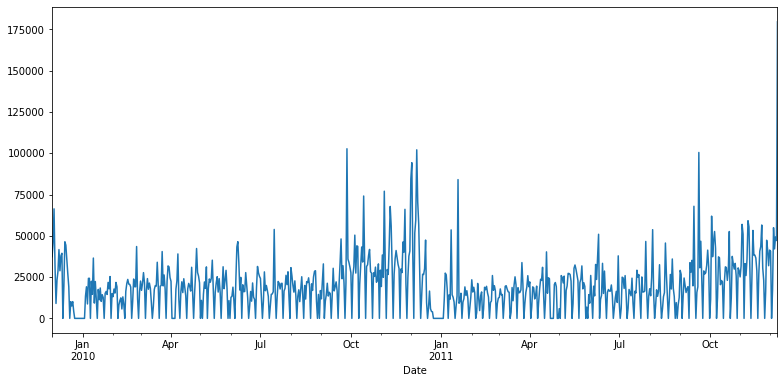

In [144]:
# Visualize the Data
ts.plot(figsize=(13,6))
plt.show()
#plt.savefig('TimeSeriesData.png')
            

In [145]:
#Checking the Null Values
ts.isnull().any()

False

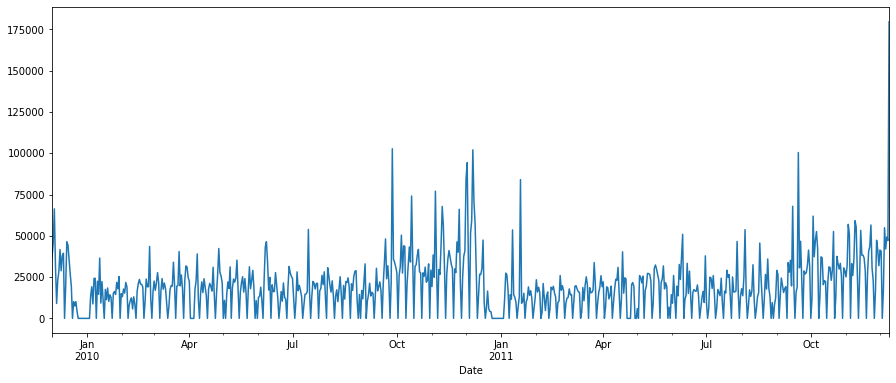

In [146]:
#Visualizing products Sales Time Series Data
ts.plot(figsize=(15, 6))
plt.show()

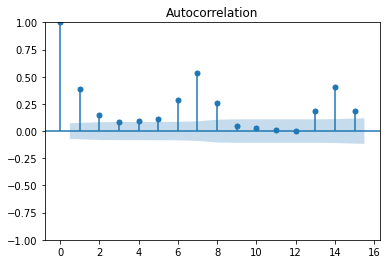

In [147]:
###ACF of Days

from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts,lags=15)
pyplot.show()
#plt.savefig('acf.png')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


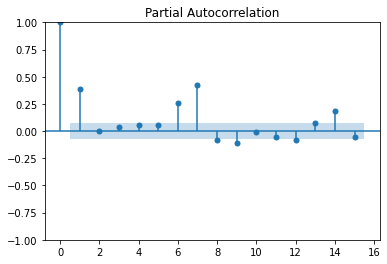

In [148]:
###PACF of Days
##Don't count it ,just printed the pacf
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(tsa)
plot_pacf(ts, lags=15)
pyplot.show()
#plt.savefig('pacf.svg')
#plt.plot(range(10), range(10))

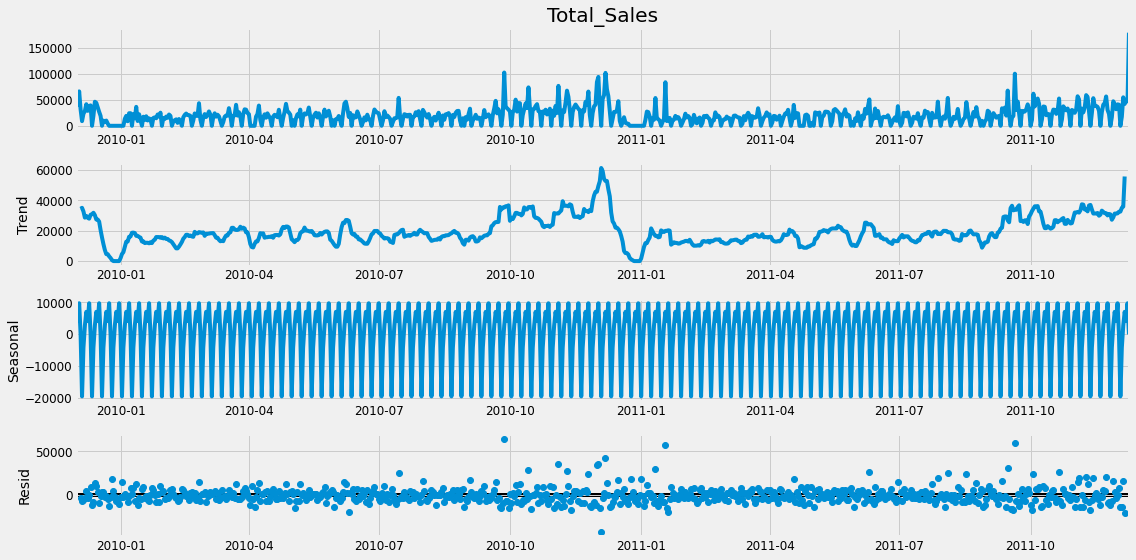

In [149]:
# Importing the requied liberly and visualize the Data
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()
#plt.savefig('Seasonal_decompose_Time_series_Data.png')

In [150]:
# Applying the Arima Model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [151]:
#
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17103.09437088263
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16655.06549805006
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16634.253329508174
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:15998.93168812797
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16520.31417176069
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16249.151715769844
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16212.389989509724
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:15975.953426948874
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16755.071936521923
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16430.16571880396
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16515.755574290168
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:15937.210738141079
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16446.140401004144
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16298.855605167084
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16121.67241642173
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:15936.025406204306
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16510.671372036755
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:16218.37661600685

In [152]:
# Counting the fitting values in the model
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4772      0.124      3.858      0.000       0.235       0.720
ma.L1         -0.0670      0.144     -0.465      0.642      -0.350       0.216
ar.S.L12      -0.1667      0.074     -2.261      0.024      -0.311      -0.022
ma.S.L12      -0.8634      0.042    -20.672      0.000      -0.945      -0.782
sigma2      4.548e+08   4.69e-10    9.7e+17      0.000    4.55e+08    4.55e+08


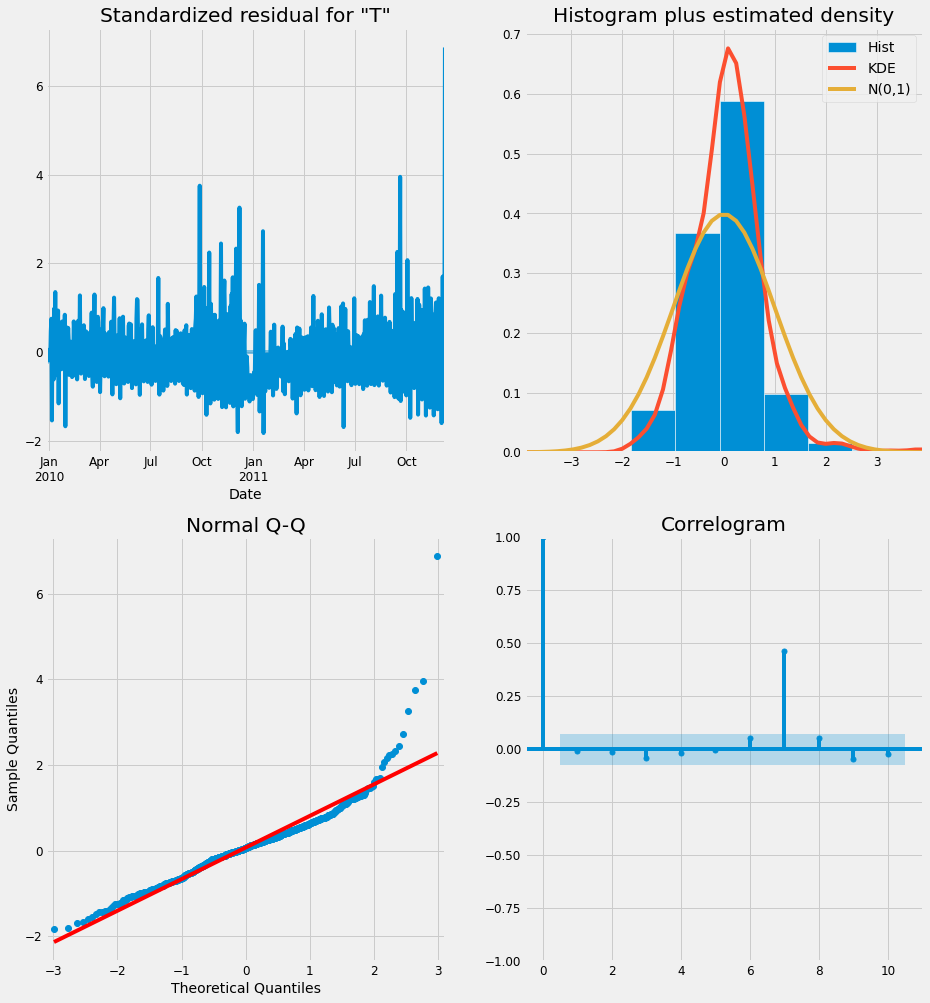

In [153]:
# Visualize the Time Series Model
results.plot_diagnostics(figsize=(14, 16))
plt.show()


#plt.savefig('Standardized_Residual.png')
            

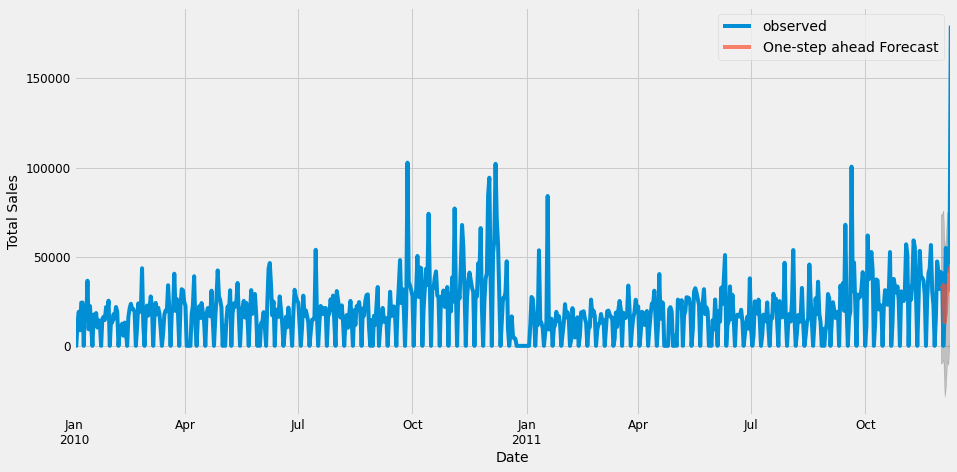

In [154]:
#Validating the forecasts
pred = results.get_prediction(start=pd.to_datetime('2011-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

#plt.savefig('Model_Validation.png')
            

In [155]:
# Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = ts['2011-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2726018617.5


In [156]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 52211.29


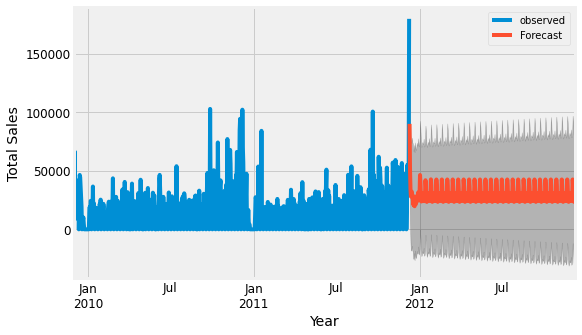

In [207]:
#Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=365)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(8, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

#plt.savefig('Prediction.png')
            

In [158]:
##LINEAR REGRESSION IMPLEMENTATION TESTING ------------------------------------------------------------------------
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
%matplotlib inline

In [159]:
df_lr=pd.read_csv("data_eda.csv")

In [160]:
df_lr.head(5)

,Invoice,InvoiceDate,Year_Month,Date,Month,Week,Day,Hour,Day_of_week,Quarter,Year,StockCode,Description,Quantity,Price,Total_Sales,CustomerID,Country
0,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.4,13085,United Kingdom
1,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,79323P,PINK CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
2,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,79323W,WHITE CHERRY LIGHTS,12,6.75,81.0,13085,United Kingdom
3,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.8,13085,United Kingdom
4,489434,2009-12-01 07:45:00,200912,2009-12-01,12,49,2,7,Tuesday,4,2009,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.0,13085,United Kingdom


In [161]:
dflr=df_lr[['Week', 'Month', 'Quarter', 'Year', 'Quantity','Price','Total_Sales']]

In [162]:
dflr.head(5)

,Week,Month,Quarter,Year,Quantity,Price,Total_Sales
0,49,12,4,2009,12,6.95,83.4
1,49,12,4,2009,12,6.75,81.0
2,49,12,4,2009,12,6.75,81.0
3,49,12,4,2009,48,2.10,100.8
4,49,12,4,2009,24,1.25,30.0


In [163]:
dflr.tail(5)

,Week,Month,Quarter,Year,Quantity,Price,Total_Sales
725245,49,12,4,2011,12,1.95,23.4
725246,49,12,4,2011,8,2.95,23.6
725247,49,12,4,2011,24,1.25,30.0
725248,49,12,4,2011,24,8.95,214.8
725249,49,12,4,2011,10,7.08,70.8


In [164]:
dflr_week=dflr.groupby('Week').sum()

In [165]:
dflr_month=dflr.groupby('Month').sum()

In [166]:
dflr_quarter=dflr.groupby('Quarter').sum()

In [167]:
dflr_year=dflr.groupby('Year').sum()

## Week

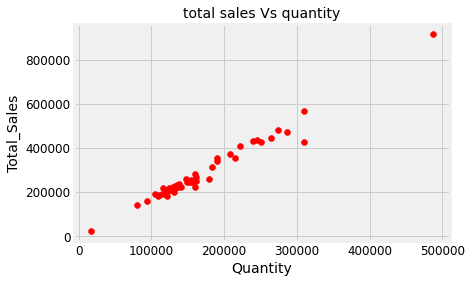

In [168]:
plt.scatter(dflr_week['Quantity'], dflr_week['Total_Sales'], color='red')
plt.title('total sales Vs quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Total_Sales'>

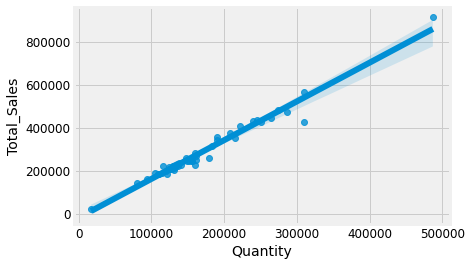

In [169]:
sb.regplot(x='Quantity',y='Total_Sales',data=dflr_week)

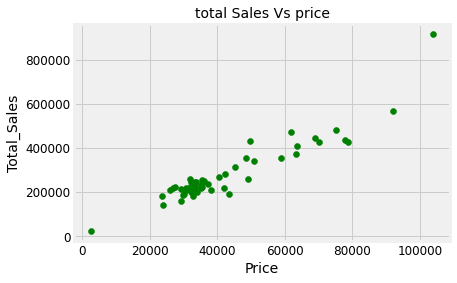

In [170]:
plt.scatter(dflr_week['Price'], dflr_week['Total_Sales'], color='green')
plt.title('total Sales Vs price', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Total_Sales'>

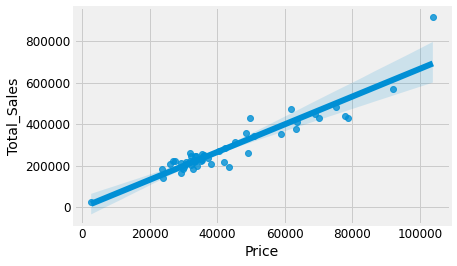

In [171]:
sb.regplot(x='Price',y='Total_Sales',data=dflr_week)

In [172]:
#Multiple Linear regression prediction
import statsmodels.api as sm

X_week = dflr_week[['Quantity','Price']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_week = dflr_week['Total_Sales']

predictors = ['Quantity','Price']
X_week = dflr_week[predictors]
Y_week = dflr_week['Total_Sales']

# Initialise and fit model
lm_week = LinearRegression()
model_week = lm_week.fit(X_week, Y_week)

# with sklearn
regr_week = linear_model.LinearRegression()
regr_week.fit(X_week, Y_week)

print('Intercept: \n', regr_week.intercept_)
print('Coefficients: \n', regr_week.coef_)


# prediction with sklearn

New_Quantity_week = 70192
New_UnitPrice_week = 15992.100
print ('Predicted Total_Sales: \n', regr_week.predict([[New_Quantity_week,New_UnitPrice_week]]))


# with statsmodels
#X = sm.add_constant(X) # adding a constant

#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

Intercept: 
 -21972.9354638473
Coefficients: 
 [1.59591015 0.88989954]
Predicted Total_Sales: 
 [104278.55192919]


In [173]:
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(lm_week.predict(X_week), Y_week))

0.9704978732117653


In [174]:
## check the predection result of the model
-25840.69196338067+(1.11741164)*(70192)+(15992.100)*(2.75796847)

96698.37344058634

In [175]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm_week.predict(X_week), Y_week))

0.9704978732117653


## Month

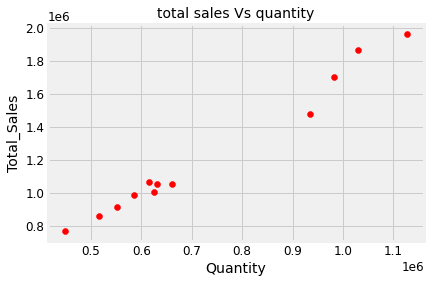

In [176]:
plt.scatter(dflr_month['Quantity'], dflr_month['Total_Sales'], color='red')
plt.title('total sales Vs quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Total_Sales'>

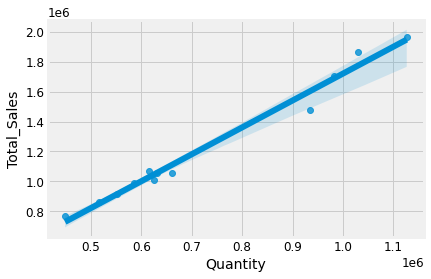

In [177]:
sb.regplot(x='Quantity',y='Total_Sales',data=dflr_month)

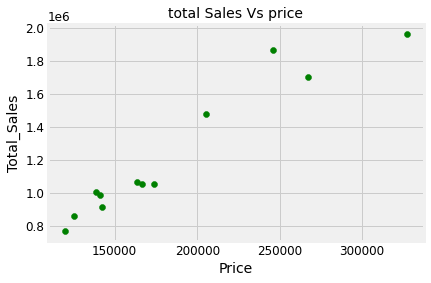

In [178]:
plt.scatter(dflr_month['Price'], dflr_month['Total_Sales'], color='green')
plt.title('total Sales Vs price', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Total_Sales'>

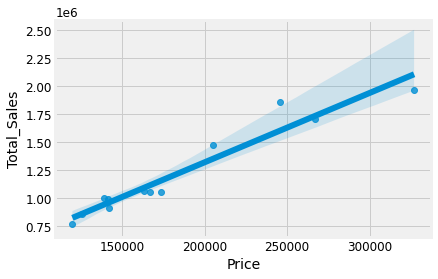

In [179]:
sb.regplot(x='Price',y='Total_Sales',data=dflr_month)

In [180]:
#Multiple Linear regression prediction
import statsmodels.api as sm

X_month = dflr_month[['Quantity','Price']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_month = dflr_month['Total_Sales']

predictors = ['Quantity','Price']
X_month = dflr_month[predictors]
Y_month = dflr_month['Total_Sales']

# Initialise and fit model
lm_month = LinearRegression()
model_month = lm_month.fit(X_month, Y_month)

# with sklearn
regr_month = linear_model.LinearRegression()
regr_month.fit(X_month, Y_month)

print('Intercept: \n', regr_month.intercept_)
print('Coefficients: \n', regr_month.coef_)


# prediction with sklearn

New_Quantity = 70192
New_UnitPrice = 15992.100
print ('Predicted Total_Sales: \n', regr_month.predict([[New_Quantity, New_UnitPrice]]))


# with statsmodels
#X = sm.add_constant(X) # adding a constant

#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

Intercept: 
 -63191.07355078356
Coefficients: 
 [1.48104997 1.16757846]
Predicted Total_Sales: 
 [59438.81717112]


In [181]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm_month.predict(X_month), Y_month))

0.9854532453386753


In [182]:
## check the predection result of the model
-134933.75492756767+(1.30774663)*(70192)+(15992.100)*(2.07572295)

-9945.234485912668

In [183]:
from sklearn.metrics import r2_score
print(r2_score(lm_month.predict(X_month), Y_month))

0.9854532453386753


## Quarter

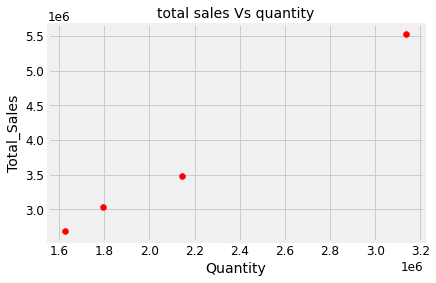

In [184]:
plt.scatter(dflr_quarter['Quantity'], dflr_quarter['Total_Sales'], color='red')
plt.title('total sales Vs quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Total_Sales'>

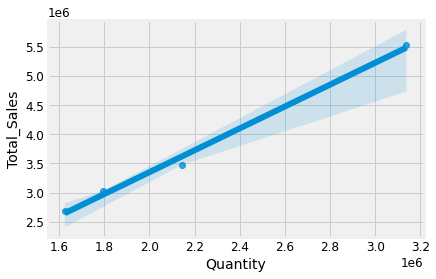

In [185]:
sb.regplot(x='Quantity',y='Total_Sales',data=dflr_quarter)

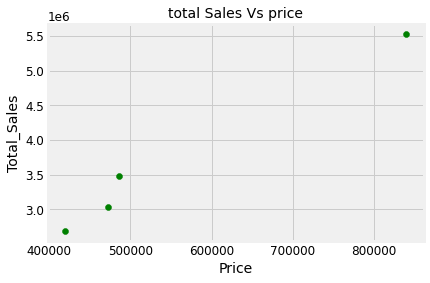

In [186]:
plt.scatter(dflr_quarter['Price'], dflr_quarter['Total_Sales'], color='green')
plt.title('total Sales Vs price', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Total_Sales'>

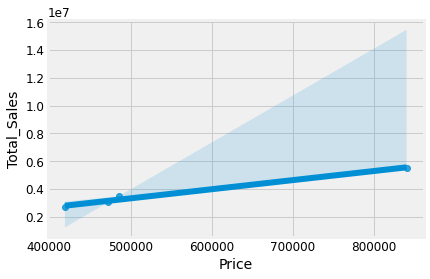

In [187]:
sb.regplot(x='Price',y='Total_Sales',data=dflr_quarter)

In [188]:
#Multiple Linear regression prediction
import statsmodels.api as sm

X_quarter = dflr_quarter[['Quantity','Price']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_quarter = dflr_quarter['Total_Sales']

predictors = ['Quantity','Price']
X_quarter = dflr_quarter[predictors]
Y_quarter = dflr_quarter['Total_Sales']

# Initialise and fit model
lm_quarter = LinearRegression()
model_quarter = lm_quarter.fit(X_quarter, Y_quarter)

# with sklearn
regr_quarter = linear_model.LinearRegression()
regr_quarter.fit(X_quarter, Y_quarter)

print('Intercept: \n', regr_quarter.intercept_)
print('Coefficients: \n', regr_quarter.coef_)


# prediction with sklearn

New_Quantity = 70192
New_UnitPrice = 15992.100
print ('Predicted Total_Sales: \n', regr_quarter.predict([[New_Quantity,New_UnitPrice]]))


# with statsmodels
#X = sm.add_constant(X) # adding a constant

#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

Intercept: 
 -280743.2262556716
Coefficients: 
 [1.19763127 2.44498985]
Predicted Total_Sales: 
 [-157578.57030257]


In [189]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm_quarter.predict(X_quarter), Y_quarter))

0.9999716728809319


In [190]:
## check the predection result of the model
-473862.3857860463+(1.10656107)*(70192)+(15992.100)*(3.01654014)

-347949.8395877123

In [191]:
from sklearn.metrics import r2_score
print(r2_score(lm_quarter.predict(X_quarter), Y_quarter))

0.9999716728809319


## Year

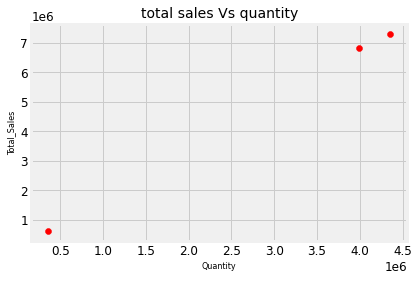

In [192]:
plt.scatter(dflr_year['Quantity'], dflr_year['Total_Sales'], color='red')
plt.title('total sales Vs quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=8)
plt.ylabel('Total_Sales', fontsize=8)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Total_Sales'>

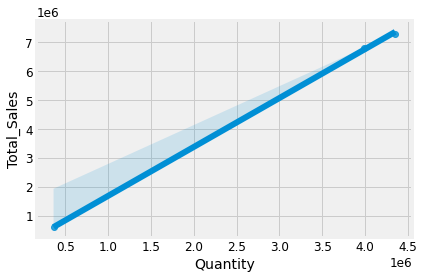

In [193]:
sb.regplot(x='Quantity',y='Total_Sales',data=dflr_year)

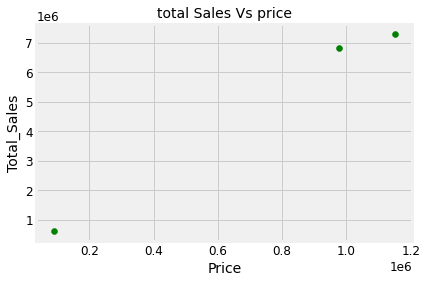

In [194]:
plt.scatter(dflr_year['Price'], dflr_year['Total_Sales'], color='green')
plt.title('total Sales Vs price', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Total_Sales'>

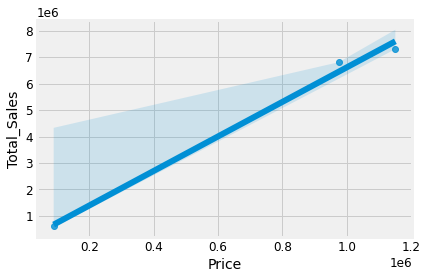

In [195]:
sb.regplot(x='Price',y='Total_Sales',data=dflr_year)

In [196]:
#Multiple Linear regression prediction
import statsmodels.api as sm

X_year = dflr_year[['Quantity','Price']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_year = dflr_year['Total_Sales']

predictors = ['Quantity','Price']
X_year = dflr_year[predictors]
Y_year = dflr_year['Total_Sales']

# Initialise and fit model
lm_year = LinearRegression()
model_year = lm_year.fit(X_year, Y_year)

# with sklearn
regr_year = linear_model.LinearRegression()
regr_year.fit(X_year, Y_year)

print('Intercept: \n', regr_year.intercept_)
print('Coefficients: \n', regr_year.coef_)


# prediction with sklearn

New_Quantity = 70192
New_UnitPrice = 15992.100
print ('Predicted Total_Sales: \n', regr_year.predict([[New_Quantity,New_UnitPrice]]))


# with statsmodels
#X = sm.add_constant(X) # adding a constant

#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

Intercept: 
 -3876.848276382312
Coefficients: 
 [ 2.09038149 -1.5619126 ]
Predicted Total_Sales: 
 [117872.9467942]


In [197]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm_year.predict(X_year), Y_year))

1.0


In [198]:
## check the predection result of the model
73689.86639988422+(7.36500066)*(70192)+(15992.100)*(-23.74276454)

210957.3279264702

In [199]:
from sklearn.metrics import r2_score
print(r2_score(lm_year.predict(X_year), Y_year))

1.0
